In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
original_data=pd.read_csv("ACYP.csv")

df = original_data.copy()

print(list(df.columns))

temperature = df['Temperature (°C)']
precipitation = df['Precipitation (mm)']
humidity = df['Humidity (%)']
wind_speed = df['Wind Speed (km/h)']
soil_type = df['Soil Type']
soil_ph = df['Soil pH']
nitrogen = df['Nitrogen (N)']
phosphorus = df['Phosphorus (P)']
potassium = df['Potassium (K)']
soil_moisture = df['Soil Moisture (%)']
rice_variety = df['Rice Variety']
fertilizer_type = df['Fertilizer Type']
fertilizer_quantity = df['Fertilizer Quantity (kg/ha)']
irrigation_type = df['Irrigation Type']
irrigation_frequency = df['Irrigation Frequency (per month)']
location = df['Location']
yield_ = df['Yield (kg/ha)']
quality_grade = df['Quality (grade)']
cost_of_production = df['Cost of Production (₹/ha)']
market_price = df['Market Price (₹/kg)']

df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temperature (°C)                  85 non-null     float64
 1   Precipitation (mm)                87 non-null     float64
 2   Humidity (%)                      87 non-null     float64
 3   Wind Speed (km/h)                 86 non-null     float64
 4   Soil Type                         87 non-null     object 
 5   Soil pH                           87 non-null     float64
 6   Nitrogen (N)                      76 non-null     float64
 7   Phosphorus (P)                    76 non-null     float64
 8   Potassium (K)                     76 non-null     float64
 9   Soil Moisture (%)                 87 non-null     float64
 10  Rice Variety                      87 non-null     object 
 11  Fertilizer Type                   87 non-null     object 
 12  Fertilizer

**SUMMARY OF THE STATISTICS**

In [ ]:
df.describe()

,Temperature (°C),Precipitation (mm),Humidity (%),Wind Speed (km/h),Soil pH,Nitrogen (N),Phosphorus (P),Potassium (K),Soil Moisture (%),Fertilizer Quantity (kg/ha),Irrigation Frequency (per month),Yield (kg/ha),Cost of Production (₹/ha),Market Price (₹/kg)
count,85.000000,87.000000,87.000000,86.000000,87.000000,76.000000,76.000000,76.000000,87.000000,87.000000,75.000000,85.000000,75.000000,76.000000
mean,27.698179,209.755177,74.382049,9.482684,6.473921,17.996864,16.693702,17.173066,44.720505,94.709332,5.266253,2151.414338,6254.502050,42.001091
std,3.933066,42.598719,8.465528,3.725485,0.633107,4.434995,5.230156,5.543621,8.393948,18.741310,2.316697,213.471285,2315.045670,26.374473
min,20.000000,111.242732,57.706045,1.692778,5.070096,5.683675,2.009858,2.095751,21.448689,57.136496,0.097197,1692.471480,643.557056,11.377322
25%,25.000000,180.556362,67.348022,6.925000,5.953464,15.711914,12.300000,13.450000,40.276915,81.791201,3.000000,2151.334776,4386.899021,27.464376
50%,27.900000,207.406263,74.717432,9.250000,6.400000,18.000000,17.085878,17.100000,44.425739,93.123770,5.000000,2210.124942,6190.358715,36.335000
75%,31.000000,246.133694,81.275242,12.775000,6.995233,20.925000,20.525000,21.325000,50.588093,108.007949,7.000000,2271.003105,8083.854104,44.449914
max,34.908493,323.078012,89.500000,15.878596,8.084542,25.864295,27.761831,28.765884,58.908406,159.606365,12.658437,2435.562351,11658.608041,133.410000


**NUMBER OF MISSING VALUES**

In [ ]:
df.isnull().sum()

Temperature (°C)                     2
Precipitation (mm)                   0
Humidity (%)                         0
Wind Speed (km/h)                    1
Soil Type                            0
Soil pH                              0
Nitrogen (N)                        11
Phosphorus (P)                      11
Potassium (K)                       11
Soil Moisture (%)                    0
Rice Variety                         0
Fertilizer Type                      0
Fertilizer Quantity (kg/ha)          0
Irrigation Type                      0
Irrigation Frequency (per month)    12
Location                             0
Yield (kg/ha)                        2
Quality (grade)                      0
Cost of Production (₹/ha)           12
Market Price (₹/kg)                 11
dtype: int64

**FILL MISSING VALUES WITH MEAN**

In [ ]:

from sklearn.impute import SimpleImputer


num_imputer = SimpleImputer(strategy='mean')
numerical_columns_with_missing = ['Temperature (°C)', 'Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)','Wind Speed (km/h)',
                                  'Irrigation Frequency (per month)', 'Cost of Production (₹/ha)', 'Market Price (₹/kg)','Yield (kg/ha)']

df[numerical_columns_with_missing] = num_imputer.fit_transform(df[numerical_columns_with_missing])


imputed_missing_values = df[numerical_columns_with_missing].isnull().sum()
print(imputed_missing_values)


Temperature (°C)                    0
Nitrogen (N)                        0
Phosphorus (P)                      0
Potassium (K)                       0
Wind Speed (km/h)                   0
Irrigation Frequency (per month)    0
Cost of Production (₹/ha)           0
Market Price (₹/kg)                 0
Yield (kg/ha)                       0
dtype: int64


In [ ]:
df.isnull().sum()

Temperature (°C)                    0
Precipitation (mm)                  1
Humidity (%)                        1
Wind Speed (km/h)                   0
Soil Type                           1
Soil pH                             1
Nitrogen (N)                        0
Phosphorus (P)                      0
Potassium (K)                       0
Soil Moisture (%)                   1
Rice Variety                        1
Fertilizer Type                     1
Fertilizer Quantity (kg/ha)         1
Irrigation Type                     1
Irrigation Frequency (per month)    0
Location                            1
Yield (kg/ha)                       0
Quality (grade)                     1
Cost of Production (₹/ha)           0
Market Price (₹/kg)                 0
dtype: int64

In [ ]:
df.describe()

,Temperature (°C),Precipitation (mm),Humidity (%),Wind Speed (km/h),Soil pH,Nitrogen (N),Phosphorus (P),Potassium (K),Soil Moisture (%),Fertilizer Quantity (kg/ha),Irrigation Frequency (per month),Yield (kg/ha),Cost of Production (₹/ha),Market Price (₹/kg)
count,112.000000,111.000000,111.000000,112.000000,111.000000,112.000000,112.000000,112.000000,111.000000,111.000000,112.000000,112.000000,112.000000,112.000000
mean,27.894760,207.375897,74.430704,9.134679,6.491659,17.854000,17.689000,17.645000,44.890675,93.645295,4.970000,5819.479293,6541.279316,20292.266562
std,3.999752,38.966172,8.252546,3.443796,0.566497,4.052458,4.326805,4.325524,7.824284,16.989545,1.933372,130.880036,2989.070236,62351.538257
min,18.951234,111.242732,60.000000,2.779947,5.500000,10.100000,10.000000,10.000000,21.448689,65.035016,2.000000,5543.010149,2528.000000,20.230000
25%,24.880527,179.599287,68.350000,6.725566,6.000000,15.400000,14.575000,14.475000,40.645298,81.683141,3.000000,5750.330922,4388.250000,28.690000
50%,27.873325,207.406263,74.200000,9.167340,6.500000,17.854000,17.689000,17.645000,45.310781,91.693695,4.970000,5818.577436,6444.500000,38.310000
75%,31.232094,239.863820,81.250000,11.500000,6.995233,20.750000,21.175000,21.400000,50.785529,104.134098,7.000000,5873.697827,8106.750000,46.242500
max,34.800000,293.516051,89.500000,14.900000,7.500000,25.000000,25.000000,24.500000,58.157969,159.606365,8.000000,6480.096173,19638.258026,273833.426571


**BOX PLOT**

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:

# # Define a function to calculate the IQR and identify outliers
# def identify_outliers_iqr(df, column_name):
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     print(column_name, lower_bound,upper_bound)
#     # Identify outliers
#     outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
#     return outliers

# # Make a copy of the dataframe to ensure the original data is not modified
# data_copy = df.copy()

# # Apply the function to each column in your dfset to identify outliers
# outlier_dfs = {}
# for col in data_copy.columns:
#     if pd.api.types.is_numeric_dtype(data_copy[col]):
#         outlier_dfs[col] = identify_outliers_iqr(data_copy, col)

# # Example to print the outlier indices for each column
# for col, df in outlier_dfs.items():
#     print(f"Outliers for {col} are at index:")
#     print(df.index.tolist())



In [ ]:
df.describe()

,Temperature (°C),Precipitation (mm),Humidity (%),Wind Speed (km/h),Soil pH,Nitrogen (N),Phosphorus (P),Potassium (K),Soil Moisture (%),Fertilizer Quantity (kg/ha),Irrigation Frequency (per month),Yield (kg/ha),Cost of Production (₹/ha),Market Price (₹/kg)
count,112.000000,111.000000,111.000000,112.000000,111.000000,112.000000,112.000000,112.000000,111.000000,111.000000,112.000000,112.000000,112.000000,112.000000
mean,27.894760,207.375897,74.430704,9.134679,6.491659,17.854000,17.689000,17.645000,44.890675,93.645295,4.970000,5819.479293,6541.279316,20292.266562
std,3.999752,38.966172,8.252546,3.443796,0.566497,4.052458,4.326805,4.325524,7.824284,16.989545,1.933372,130.880036,2989.070236,62351.538257
min,18.951234,111.242732,60.000000,2.779947,5.500000,10.100000,10.000000,10.000000,21.448689,65.035016,2.000000,5543.010149,2528.000000,20.230000
25%,24.880527,179.599287,68.350000,6.725566,6.000000,15.400000,14.575000,14.475000,40.645298,81.683141,3.000000,5750.330922,4388.250000,28.690000
50%,27.873325,207.406263,74.200000,9.167340,6.500000,17.854000,17.689000,17.645000,45.310781,91.693695,4.970000,5818.577436,6444.500000,38.310000
75%,31.232094,239.863820,81.250000,11.500000,6.995233,20.750000,21.175000,21.400000,50.785529,104.134098,7.000000,5873.697827,8106.750000,46.242500
max,34.800000,293.516051,89.500000,14.900000,7.500000,25.000000,25.000000,24.500000,58.157969,159.606365,8.000000,6480.096173,19638.258026,273833.426571


**IDENTIFY AND REMOVE OUTLIERS**

In [ ]:


def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)''
outliers = pd.DataFrame(columns=df.columns)

for column in df.select_dtypes(include='number').columns:
    outliers[column] = detect_outliers_iqr(df[column])

rows_with_outliers = outliers.any(axis=1)

data_cleaned = df[~rows_with_outliers]

data_cleaned.to_csv('/content/cleaned_dataset.csv', index=False)

print(f"Original data contained {len(df)} records.")
print(f"Cleaned data contains {len(data_cleaned)} records after removing outliers.")


Original data contained 112 records.
Cleaned data contains 90 records after removing outliers.


In [ ]:
cleaned_data=pd.read_csv("/content/cleaned_dataset.csv")
cleaned_data.isnull().sum()

cleaned_data = cleaned_data.copy()

In [ ]:
cleaned_data.describe()

,Temperature (°C),Precipitation (mm),Humidity (%),Wind Speed (km/h),Soil pH,Nitrogen (N),Phosphorus (P),Potassium (K),Soil Moisture (%),Fertilizer Quantity (kg/ha),Irrigation Frequency (per month),Yield (kg/ha),Cost of Production (₹/ha),Market Price (₹/kg)
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,28.762970,216.209105,74.272222,9.698889,6.518889,17.783333,17.501111,17.760000,46.992787,90.327767,5.033333,5818.590048,6007.266667,34.746667
std,3.817851,34.113246,8.477611,3.328883,0.573359,4.326538,4.619049,4.757697,5.942460,13.218906,2.046922,95.591226,2095.315598,8.602510
min,20.400000,154.236405,60.000000,3.100000,5.500000,10.100000,10.000000,10.000000,35.608530,65.206119,2.000000,5590.389406,2528.000000,20.230000
25%,26.258623,188.903692,68.275000,7.225000,6.125000,14.300000,13.425000,13.575000,42.370187,80.698928,3.000000,5757.119877,4298.000000,26.412500
50%,29.265178,212.596862,72.500000,9.350000,6.500000,17.950000,17.000000,18.450000,47.414926,90.671264,5.000000,5825.505984,6018.000000,34.620000
75%,31.748527,243.984906,81.275000,12.375000,7.000000,21.075000,21.475000,22.250000,52.038778,101.166554,7.000000,5876.786138,7793.250000,42.875000
max,34.800000,293.516051,89.500000,14.900000,7.500000,25.000000,25.000000,24.500000,58.157969,118.246247,8.000000,6049.288449,9458.000000,49.790000


**BOX PLOT AFTER REMOVING OUTLIERS**

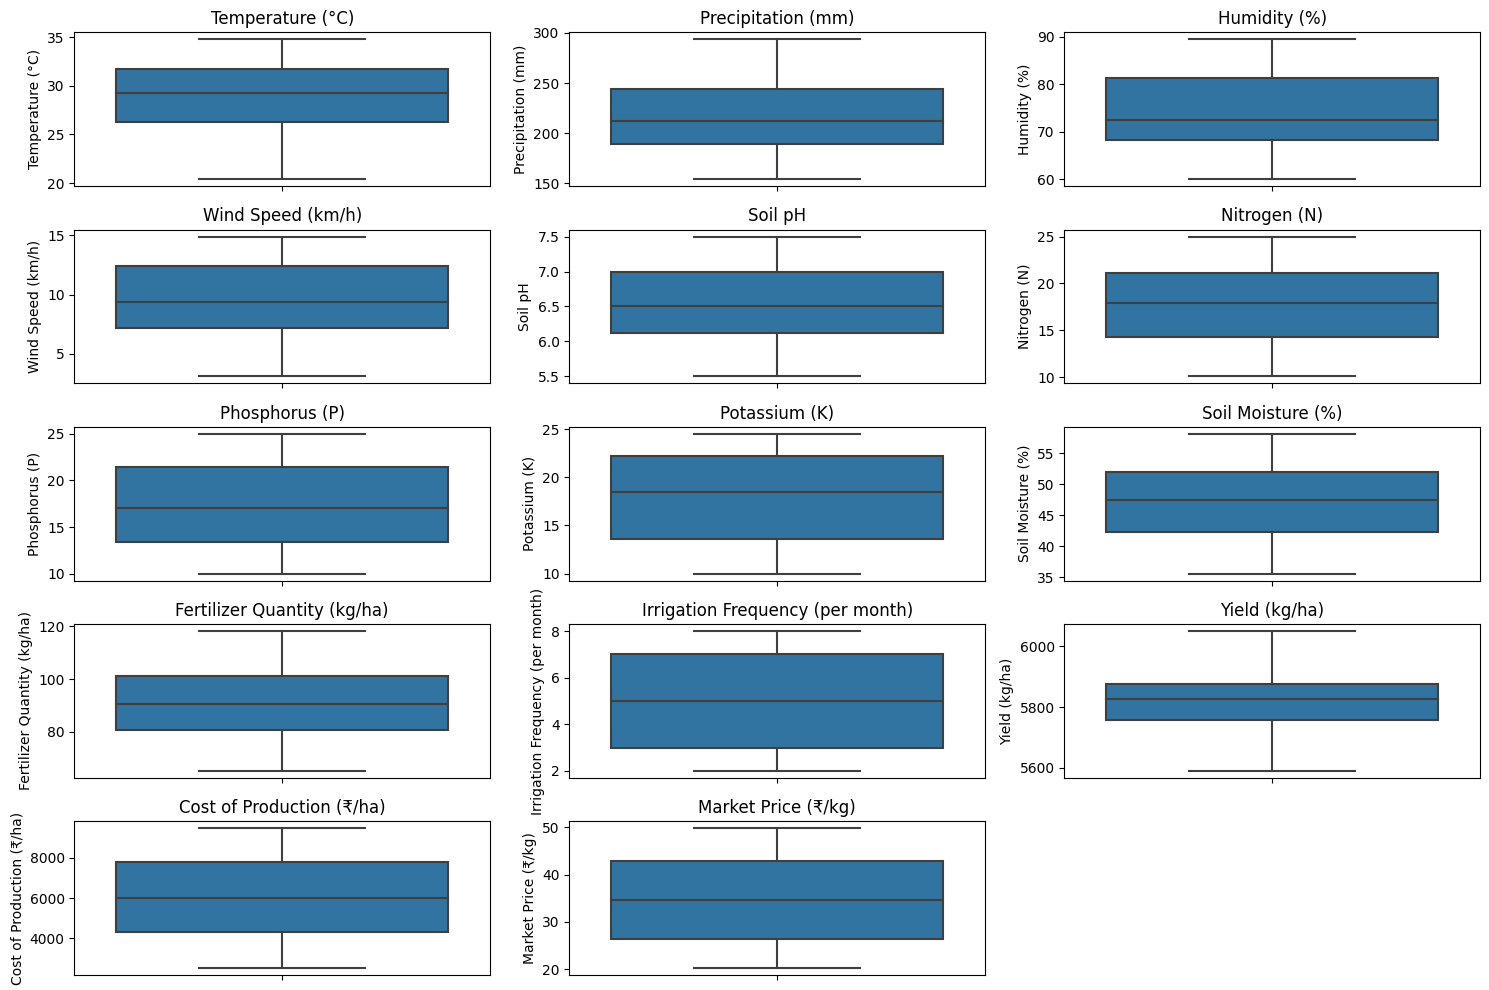

In [ ]:
numerical_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=cleaned_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**SKEWNESS**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew



target_skewness = skew(cleaned_data['Yield (kg/ha)'])
print(f"Skewness of the target variable: {target_skewness}")


Skewness of the target variable: -0.05855913071373308


In [ ]:
cleaned_data.describe()


,Temperature (°C),Precipitation (mm),Humidity (%),Wind Speed (km/h),Soil pH,Nitrogen (N),Phosphorus (P),Potassium (K),Soil Moisture (%),Fertilizer Quantity (kg/ha),Irrigation Frequency (per month),Yield (kg/ha),Cost of Production (₹/ha),Market Price (₹/kg)
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,28.762970,216.209105,74.272222,9.698889,6.518889,17.783333,17.501111,17.760000,46.992787,90.327767,5.033333,5818.590048,6007.266667,34.746667
std,3.817851,34.113246,8.477611,3.328883,0.573359,4.326538,4.619049,4.757697,5.942460,13.218906,2.046922,95.591226,2095.315598,8.602510
min,20.400000,154.236405,60.000000,3.100000,5.500000,10.100000,10.000000,10.000000,35.608530,65.206119,2.000000,5590.389406,2528.000000,20.230000
25%,26.258623,188.903692,68.275000,7.225000,6.125000,14.300000,13.425000,13.575000,42.370187,80.698928,3.000000,5757.119877,4298.000000,26.412500
50%,29.265178,212.596862,72.500000,9.350000,6.500000,17.950000,17.000000,18.450000,47.414926,90.671264,5.000000,5825.505984,6018.000000,34.620000
75%,31.748527,243.984906,81.275000,12.375000,7.000000,21.075000,21.475000,22.250000,52.038778,101.166554,7.000000,5876.786138,7793.250000,42.875000
max,34.800000,293.516051,89.500000,14.900000,7.500000,25.000000,25.000000,24.500000,58.157969,118.246247,8.000000,6049.288449,9458.000000,49.790000


**ONE-HOT ENCODING**

In [ ]:
categorical_columns = cleaned_data.select_dtypes(include=['object', 'category']).columns

df_encoded = pd.get_dummies(cleaned_data, columns=categorical_columns, drop_first=False)

min_yield = df_encoded['Yield (kg/ha)'].min()
if min_yield <= 0:
    df_encoded['Yield (kg/ha)'] += (1 - min_yield)
df_encoded['Yield (kg/ha)'] = np.log(df_encoded['Yield (kg/ha)'])

encoded_file_path = '/content/transformed_Data.csv'
df_encoded.to_csv(encoded_file_path, index=False)

print(f"Encoded dataset saved to {encoded_file_path}.")

Encoded dataset saved to /content/transformed_Data.csv.


In [ ]:
print(categorical_columns)

Index(['Soil Type', 'Rice Variety', 'Fertilizer Type', 'Irrigation Type',
       'Location', 'Quality (grade)'],
      dtype='object')


In [ ]:
df_encoded.describe()

,Temperature (°C),Precipitation (mm),Humidity (%),Wind Speed (km/h),Soil pH,Nitrogen (N),Phosphorus (P),Potassium (K),Soil Moisture (%),Fertilizer Quantity (kg/ha),...,Location_Location 4,Location_Location 5,Location_Location 6,Location_Location 7,Location_Location 8,Location_Location 9,Quality (grade)_A,Quality (grade)_B,Quality (grade)_C,Quality (grade)_D
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,28.762970,216.209105,74.272222,9.698889,6.518889,17.783333,17.501111,17.760000,46.992787,90.327767,...,0.044444,0.022222,0.055556,0.077778,0.055556,0.022222,0.311111,0.233333,0.177778,0.277778
std,3.817851,34.113246,8.477611,3.328883,0.573359,4.326538,4.619049,4.757697,5.942460,13.218906,...,0.207235,0.148231,0.230345,0.269322,0.230345,0.148231,0.465542,0.425322,0.384467,0.450412
min,20.400000,154.236405,60.000000,3.100000,5.500000,10.100000,10.000000,10.000000,35.608530,65.206119,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.258623,188.903692,68.275000,7.225000,6.125000,14.300000,13.425000,13.575000,42.370187,80.698928,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.265178,212.596862,72.500000,9.350000,6.500000,17.950000,17.000000,18.450000,47.414926,90.671264,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.748527,243.984906,81.275000,12.375000,7.000000,21.075000,21.475000,22.250000,52.038778,101.166554,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,34.800000,293.516051,89.500000,14.900000,7.500000,25.000000,25.000000,24.500000,58.157969,118.246247,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

print("Descriptive statistics for the cleaned data:")
cleaned_stats = cleaned_data.describe()
print(cleaned_stats)

cleaned_mode = cleaned_data.mode().iloc[0]
print("\nMode for the cleaned data:")
print(cleaned_mode)


Descriptive statistics for the cleaned data:
       Temperature (°C)  Precipitation (mm)  Humidity (%)  Wind Speed (km/h)  \
count         90.000000           90.000000     90.000000          90.000000   
mean          28.762970          216.209105     74.272222           9.698889   
std            3.817851           34.113246      8.477611           3.328883   
min           20.400000          154.236405     60.000000           3.100000   
25%           26.258623          188.903692     68.275000           7.225000   
50%           29.265178          212.596862     72.500000           9.350000   
75%           31.748527          243.984906     81.275000          12.375000   
max           34.800000          293.516051     89.500000          14.900000   

         Soil pH  Nitrogen (N)  Phosphorus (P)  Potassium (K)  \
count  90.000000     90.000000       90.000000      90.000000   
mean    6.518889     17.783333       17.501111      17.760000   
std     0.573359      4.326538        4

In [ ]:
transformed_data=pd.read_csv("/content/transformed_Data.csv")

transformed_data = transformed_data.copy()

print("\nDescriptive statistics for the transformed and standardized data:")
transformed_stats = transformed_data.describe()
print(transformed_stats)

transformed_mode = transformed_data.mode().iloc[0]
print("\nMode for the transformed and standardized data:")
print(transformed_mode)


Descriptive statistics for the transformed and standardized data:
       Temperature (°C)  Precipitation (mm)  Humidity (%)  Wind Speed (km/h)  \
count         90.000000           90.000000     90.000000          90.000000   
mean          28.762970          216.209105     74.272222           9.698889   
std            3.817851           34.113246      8.477611           3.328883   
min           20.400000          154.236405     60.000000           3.100000   
25%           26.258623          188.903692     68.275000           7.225000   
50%           29.265178          212.596862     72.500000           9.350000   
75%           31.748527          243.984906     81.275000          12.375000   
max           34.800000          293.516051     89.500000          14.900000   

         Soil pH  Nitrogen (N)  Phosphorus (P)  Potassium (K)  \
count  90.000000     90.000000       90.000000      90.000000   
mean    6.518889     17.783333       17.501111      17.760000   
std     0.573359 

### Implications of Descriptive Statistics on the Linear Regression Model

#### Cleaned Data:
- The central tendency and variability in the cleaned data provide insights into the average conditions and the spread of conditions under which the yields were obtained.
- For example, the average `Cost of Production (₹/ha)` is ₹5897.73 with a standard deviation of ₹1984.13, which means most of the production costs are within a range of ₹3913.60 to ₹7881.86.
- The mode for `Soil Type` being 'Laterite' suggests that it is the most common soil type in the dataset, which could be a baseline for comparison in our model.

#### Transformed and Standardized Data:
- The near-zero means in the transformed data indicate that the features are now centered around zero, making the model intercept more interpretable as the expected value of the dependent variable when all predictors are at their mean value.
- The uniform standard deviations signify that no single feature will unduly influence the model due to its scale, allowing for a fair comparison of coefficient magnitudes to determine feature importance.
- The ranges of the transformed features, particularly those that extend beyond -2 or 2, may still indicate outliers or significant variability in the data, which could affect the model's predictions. Additional investigation into these features may be warranted to ensure the robustness of the model.


**HISTOGRAM AND BAR PLOTS**

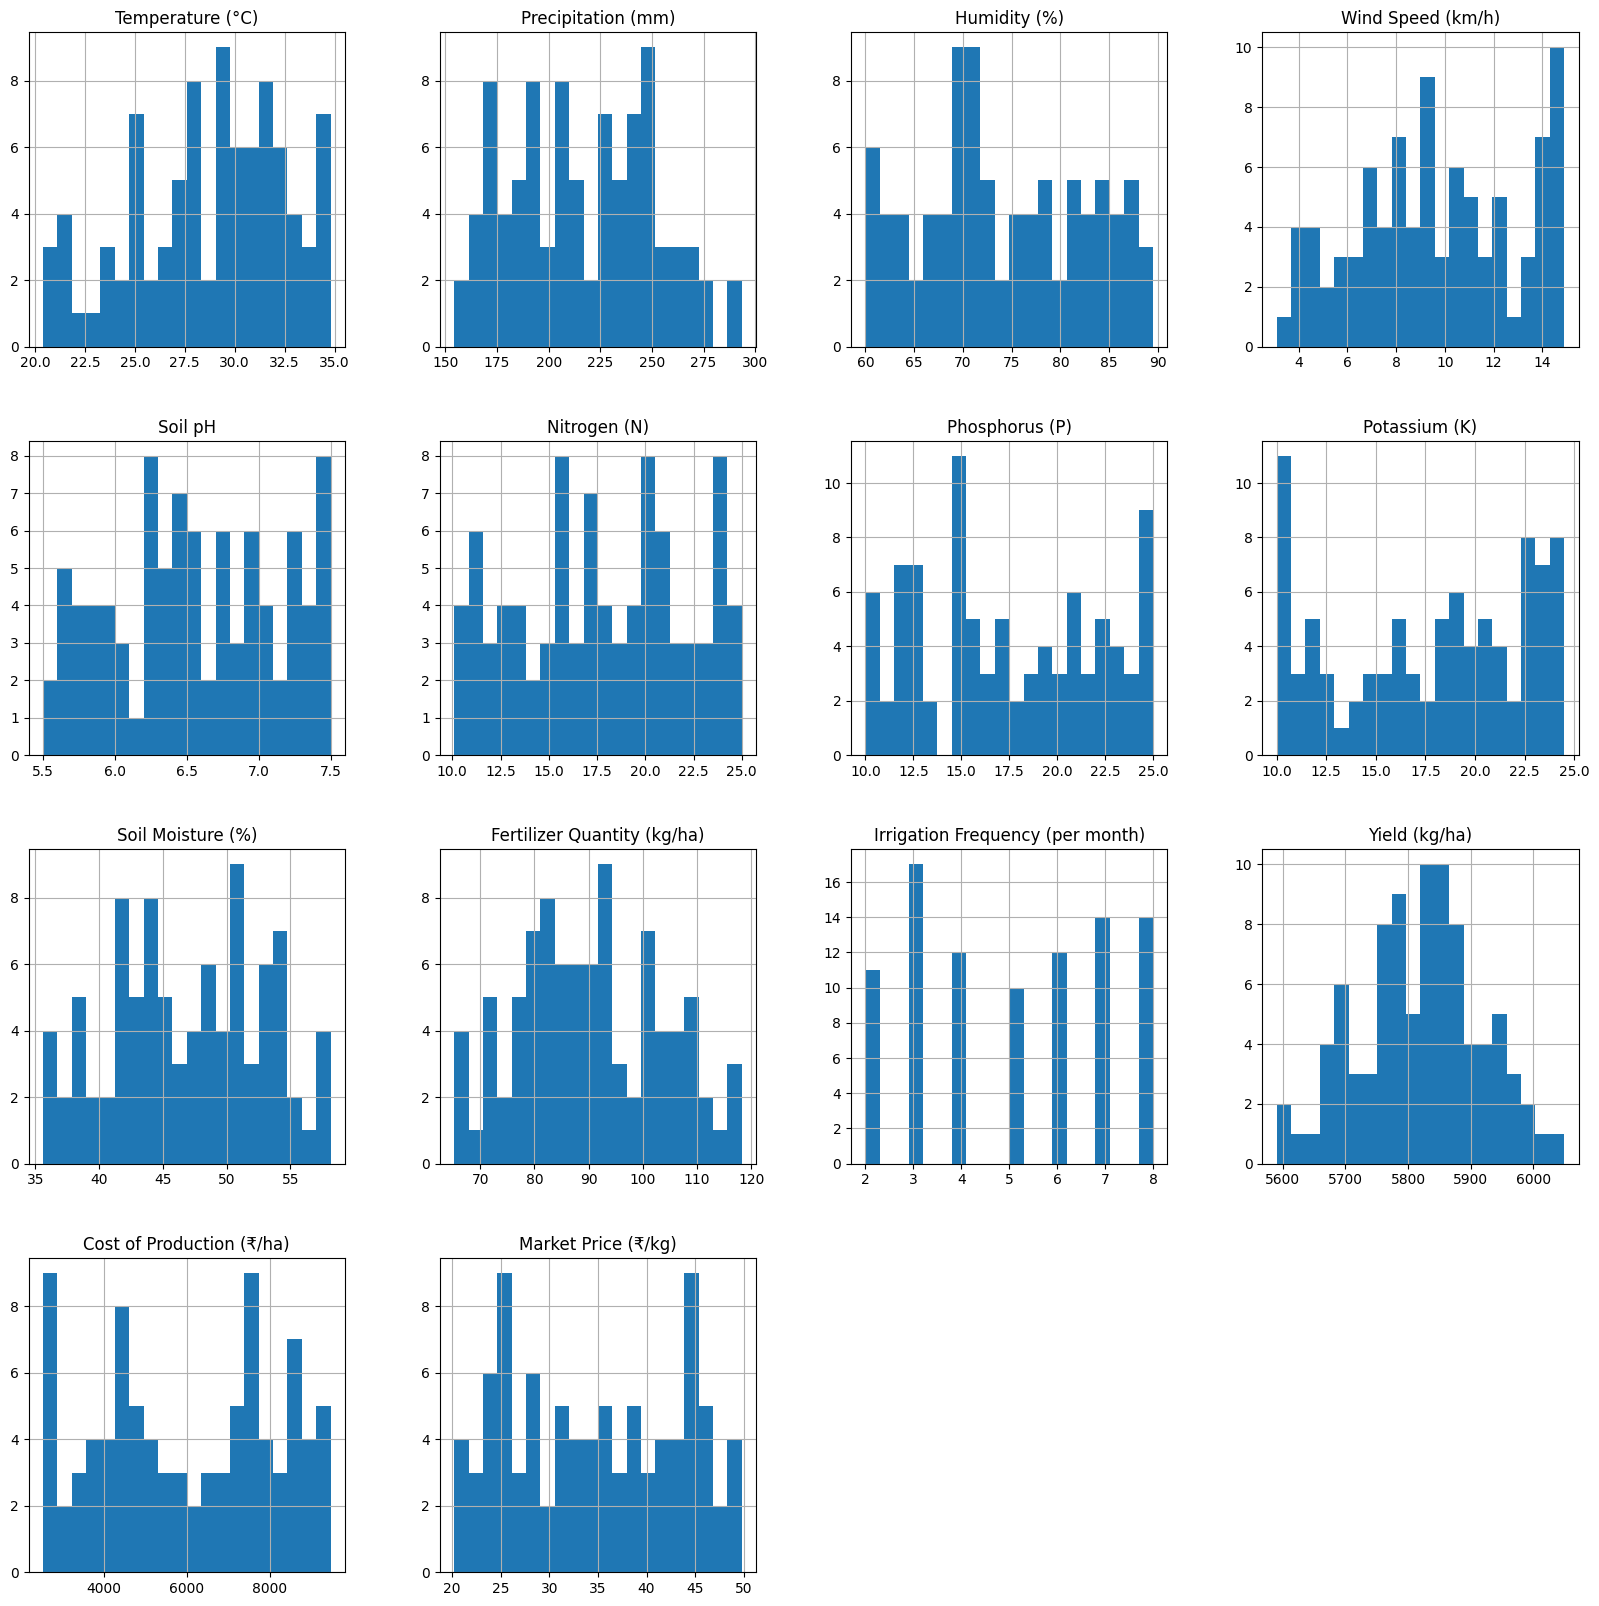

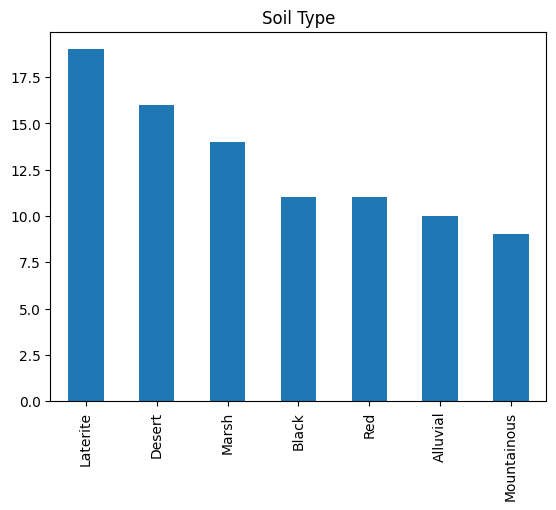

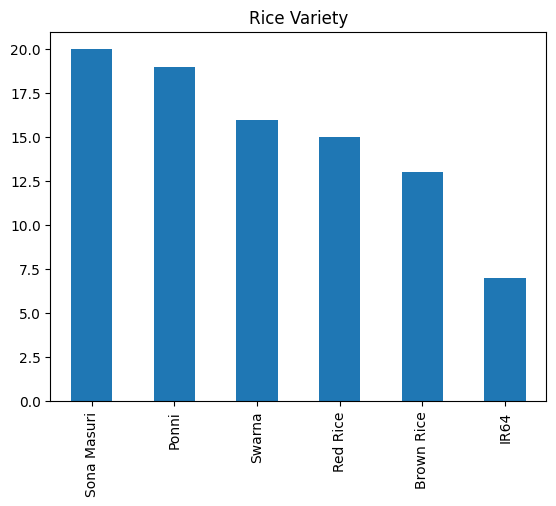

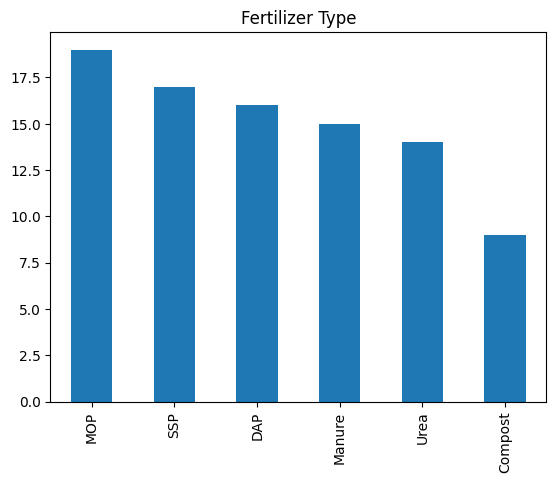

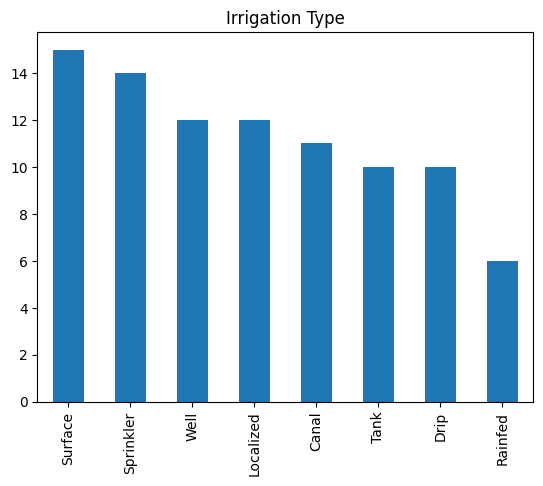

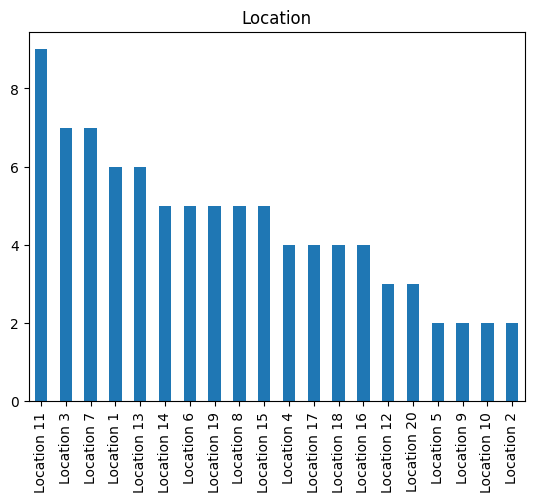

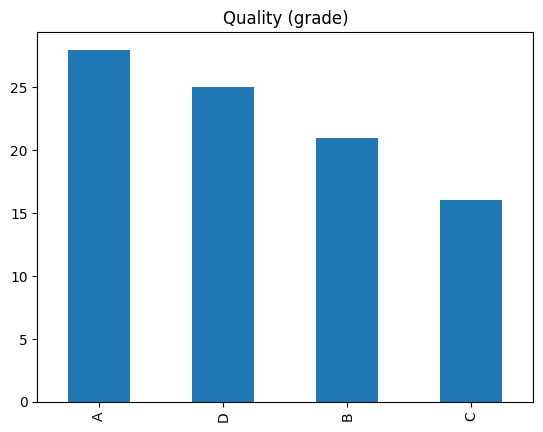

In [ ]:

cleaned_data.hist(bins=20, figsize=(20, 20))
plt.show()

for column in categorical_columns:
    cleaned_data[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()


* **Histograms and Q-Q Plots:**   
For each numerical column, the code generates a histogram
The histogram provides a visual representation of the distribution.



* **Scatter Plots:**   
For specific independent variables ('Temperature (°C)', 'Precipitation (mm)', 'Humidity (%)'), the code generates scatter plots against the dependent variable (Yield (kg/ha)) with differentiation by Rice Variety.



Index(['Temperature (°C)', 'Precipitation (mm)', 'Humidity (%)',
       'Wind Speed (km/h)', 'Soil pH', 'Nitrogen (N)', 'Phosphorus (P)',
       'Potassium (K)', 'Soil Moisture (%)', 'Fertilizer Quantity (kg/ha)',
       'Irrigation Frequency (per month)', 'Yield (kg/ha)',
       'Cost of Production (₹/ha)', 'Market Price (₹/kg)'],
      dtype='object')


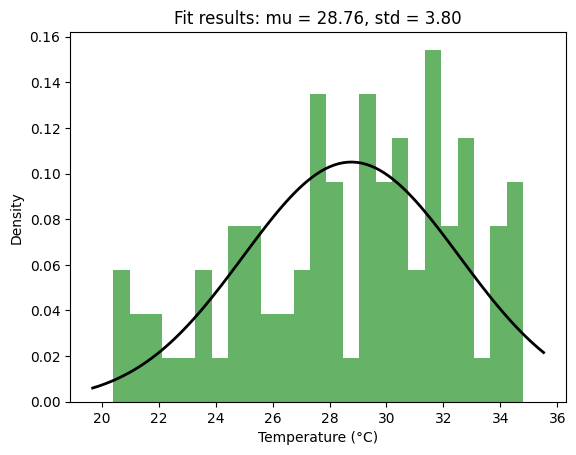

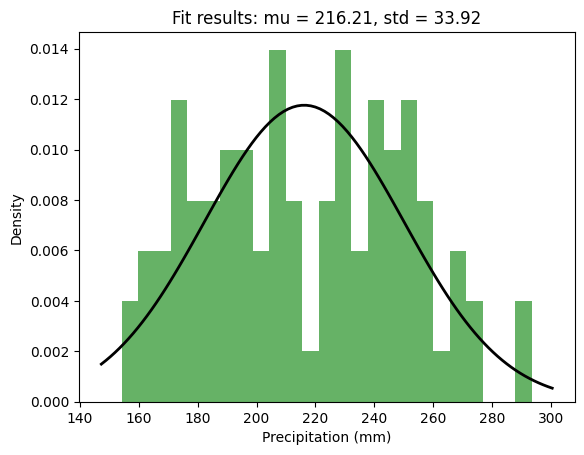

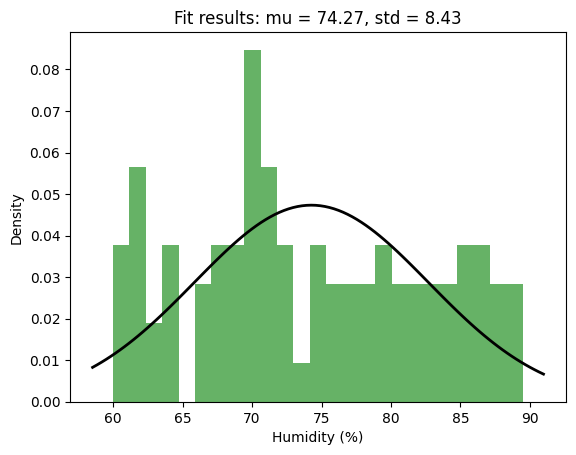

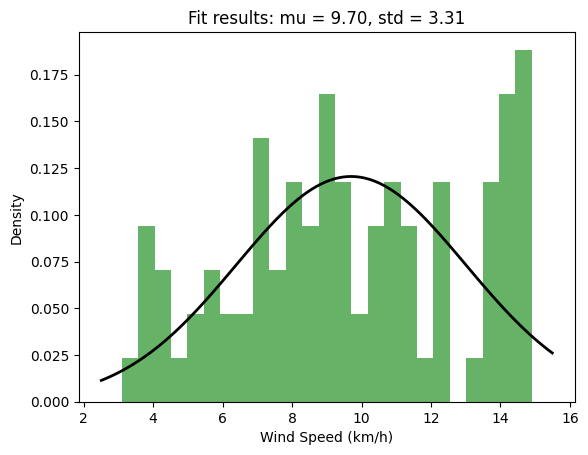

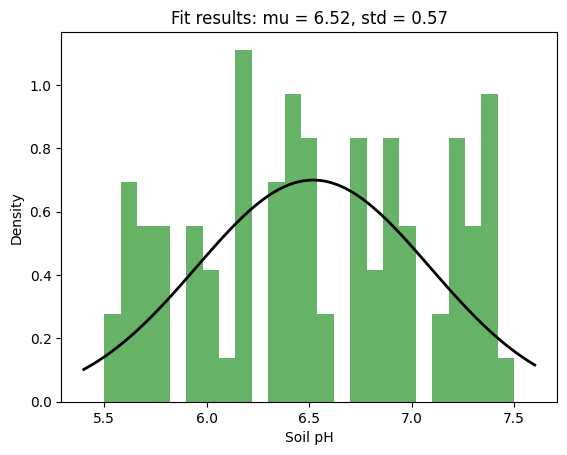

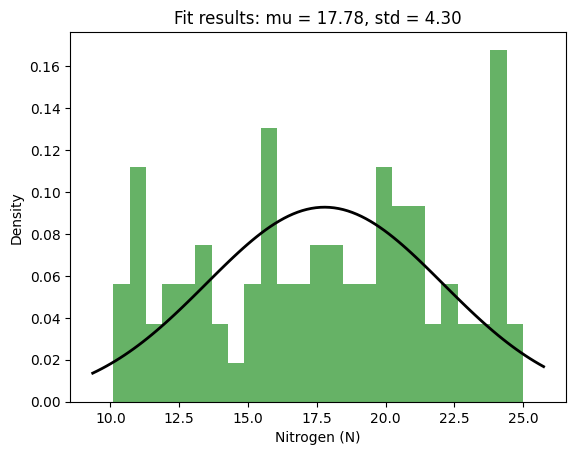

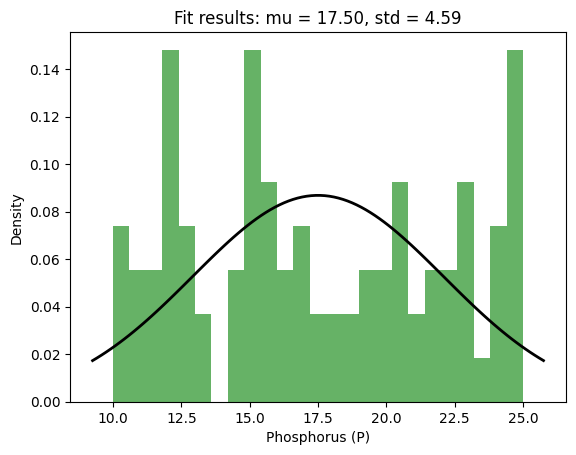

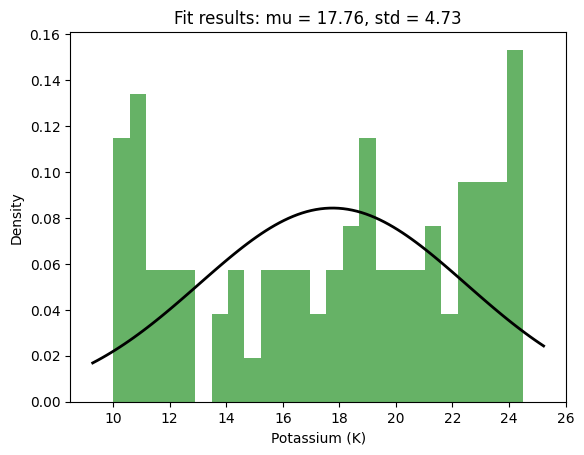

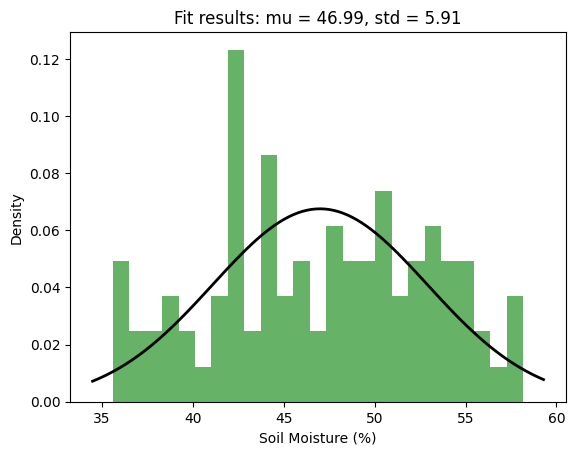

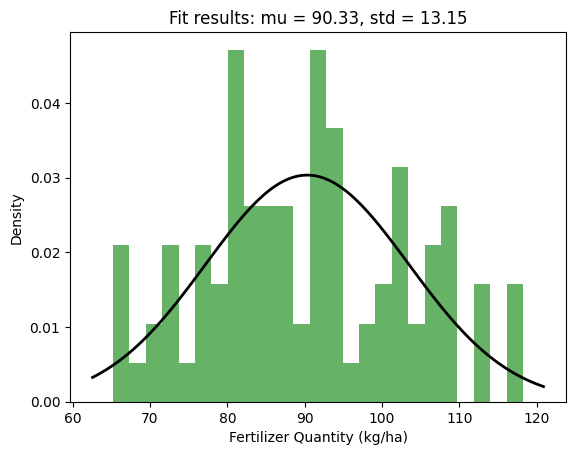

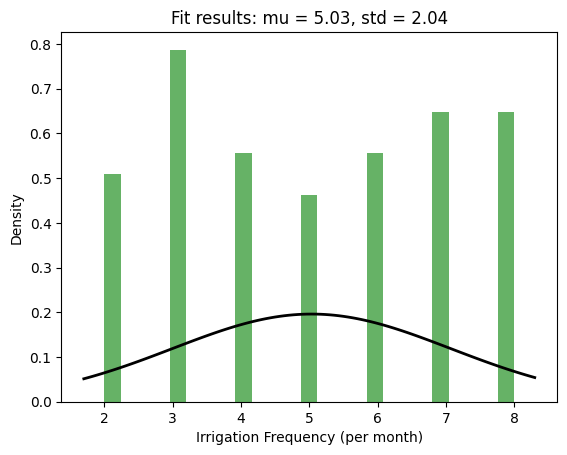

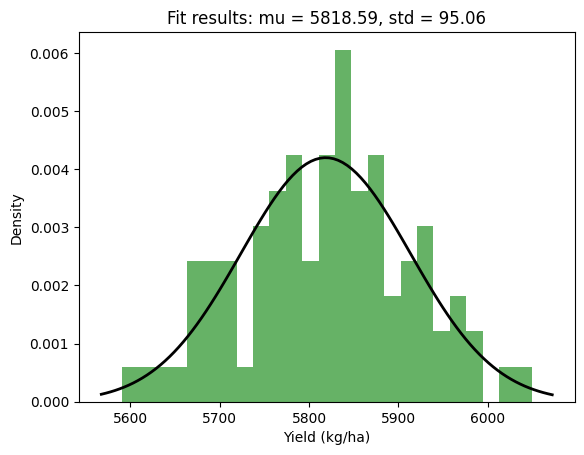

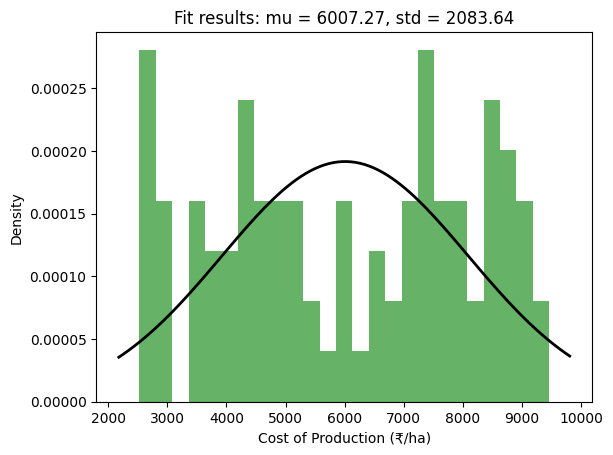

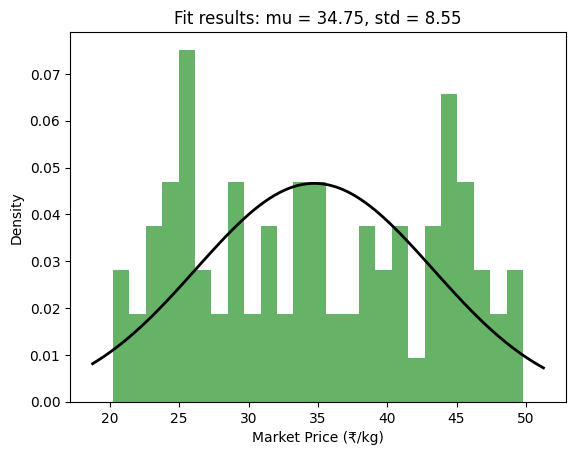

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

numerical_features = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
print(numerical_features)

for column in numerical_features:
    mu, std = norm.fit(cleaned_data[column])

    plt.hist(cleaned_data[column], bins=25, density=True, alpha=0.6, color='g')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)

    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    title = f"Fit results: mu = {mu:.2f}, std = {std:.2f}"
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Density')

    plt.show()


**IMPLICATIONS:**

* **Normality Assessment:**   
The histograms and Q-Q plots provide a visual indication of the distribution of numerical variables.
The Shapiro-Wilk test complements the visual assessment with statistical significance.

* **Correlation Coefficients:**    
Correlation coefficients quantify the strength and direction of relationships between variables.
Positive values indicate a positive correlation, and negative values indicate a negative correlation.

* **Scatter Plots:**   
Scatter plots show the relationship between independent variables and the dependent variable for different rice varieties.
Patterns in the scatter plots can offer insights into potential associations and variations





['Brown Rice', 'Ponni', 'Red Rice', 'IR64', 'Basmati', 'Swarna', 'Sona Masuri']


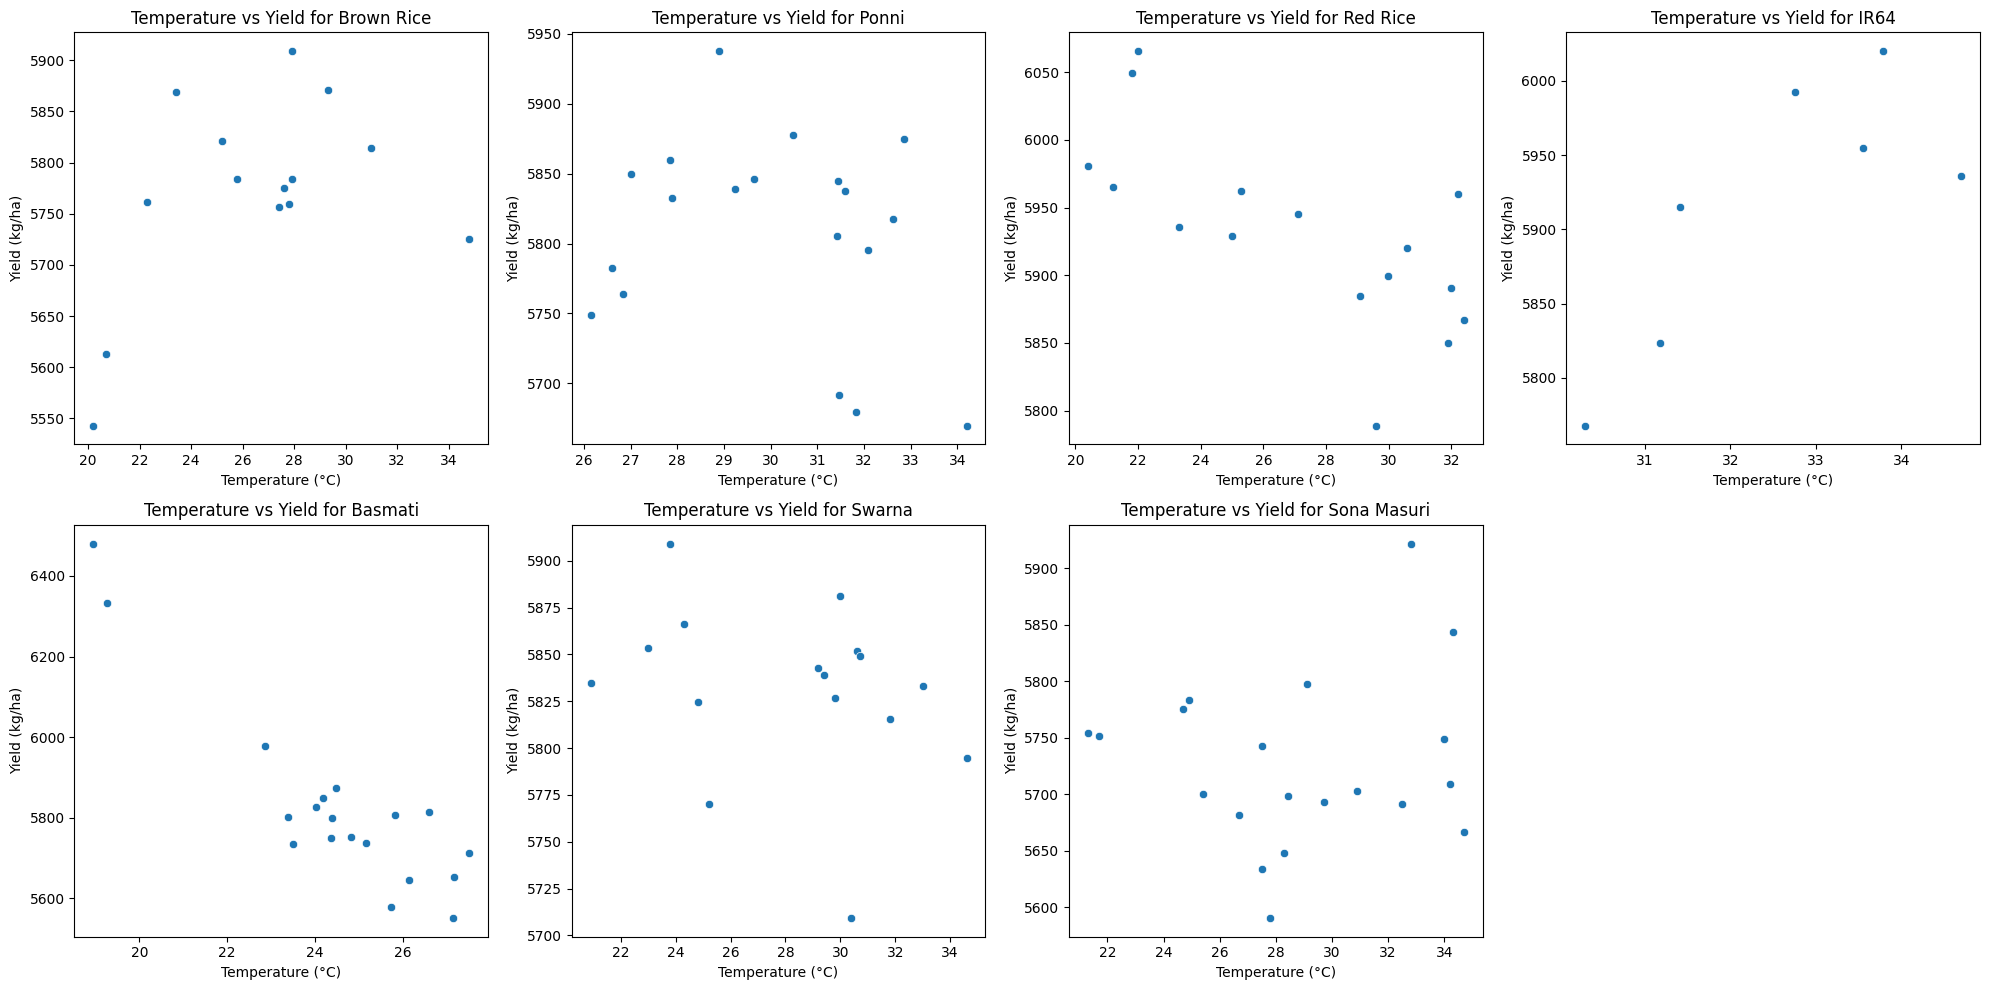

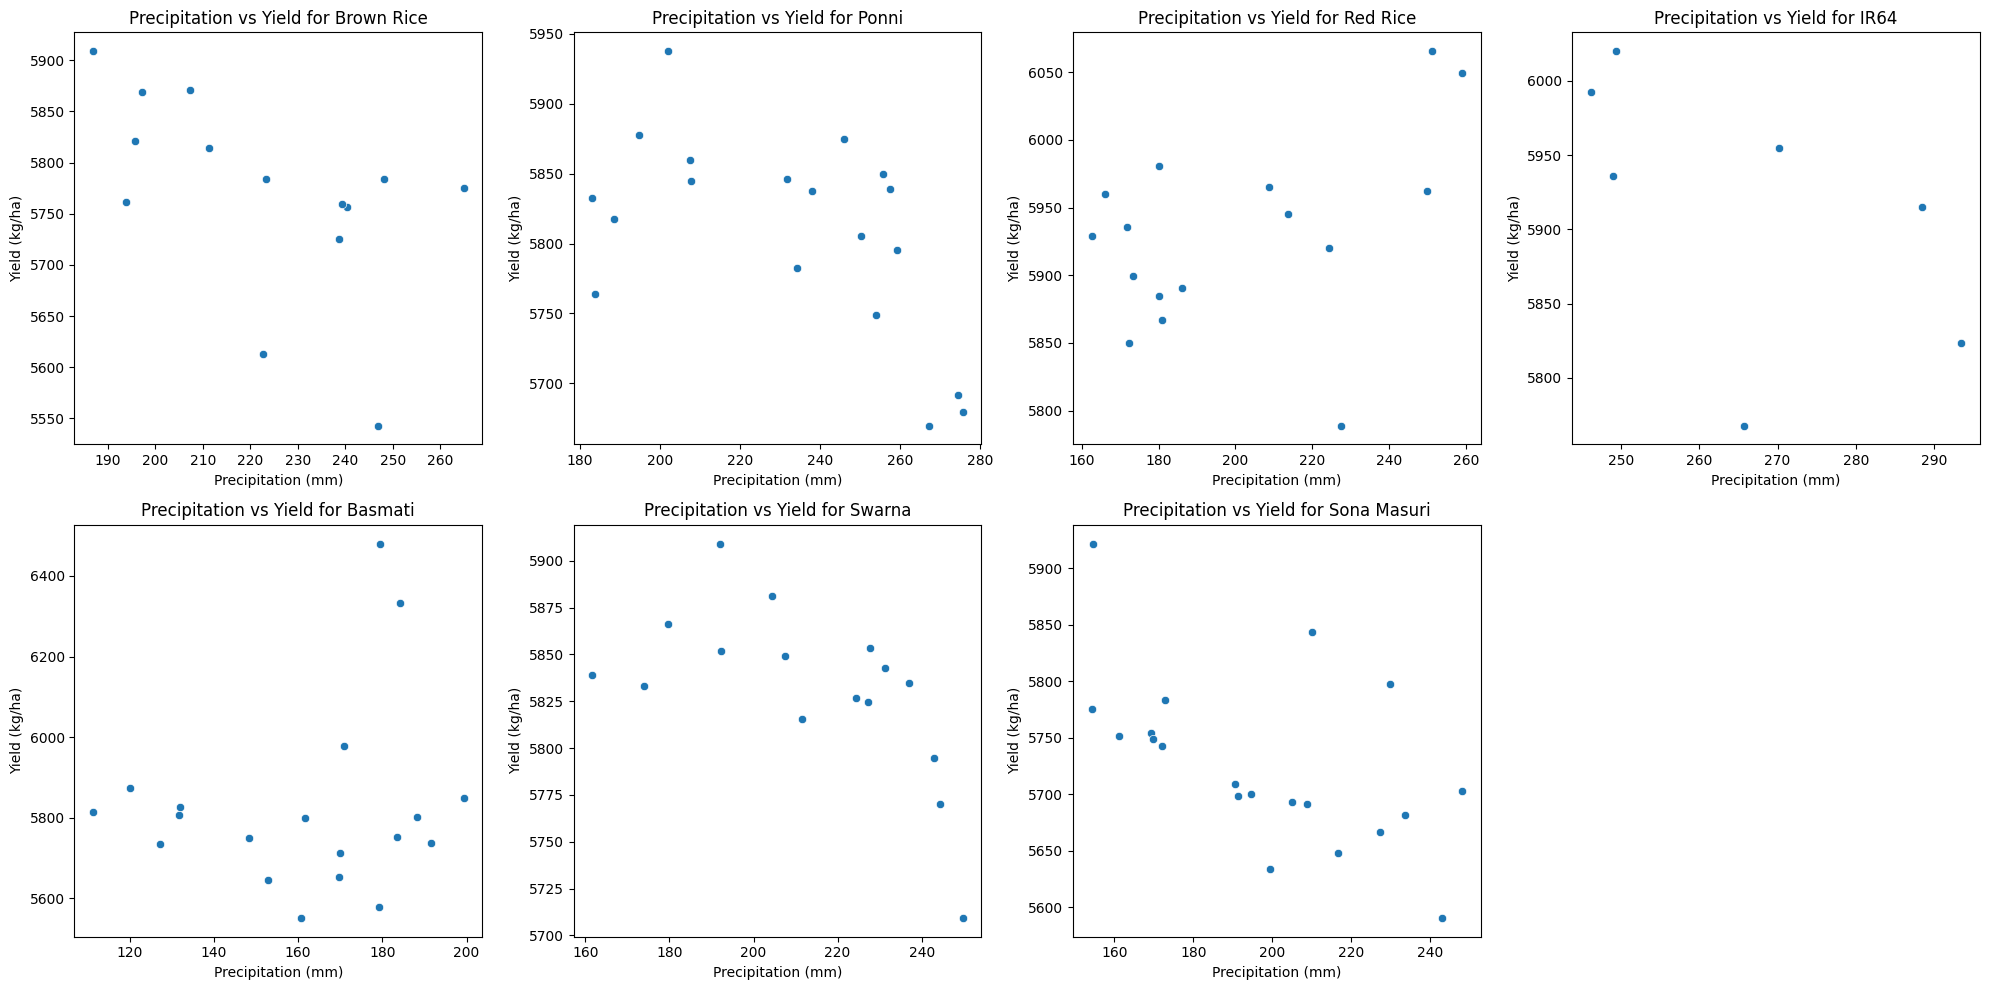

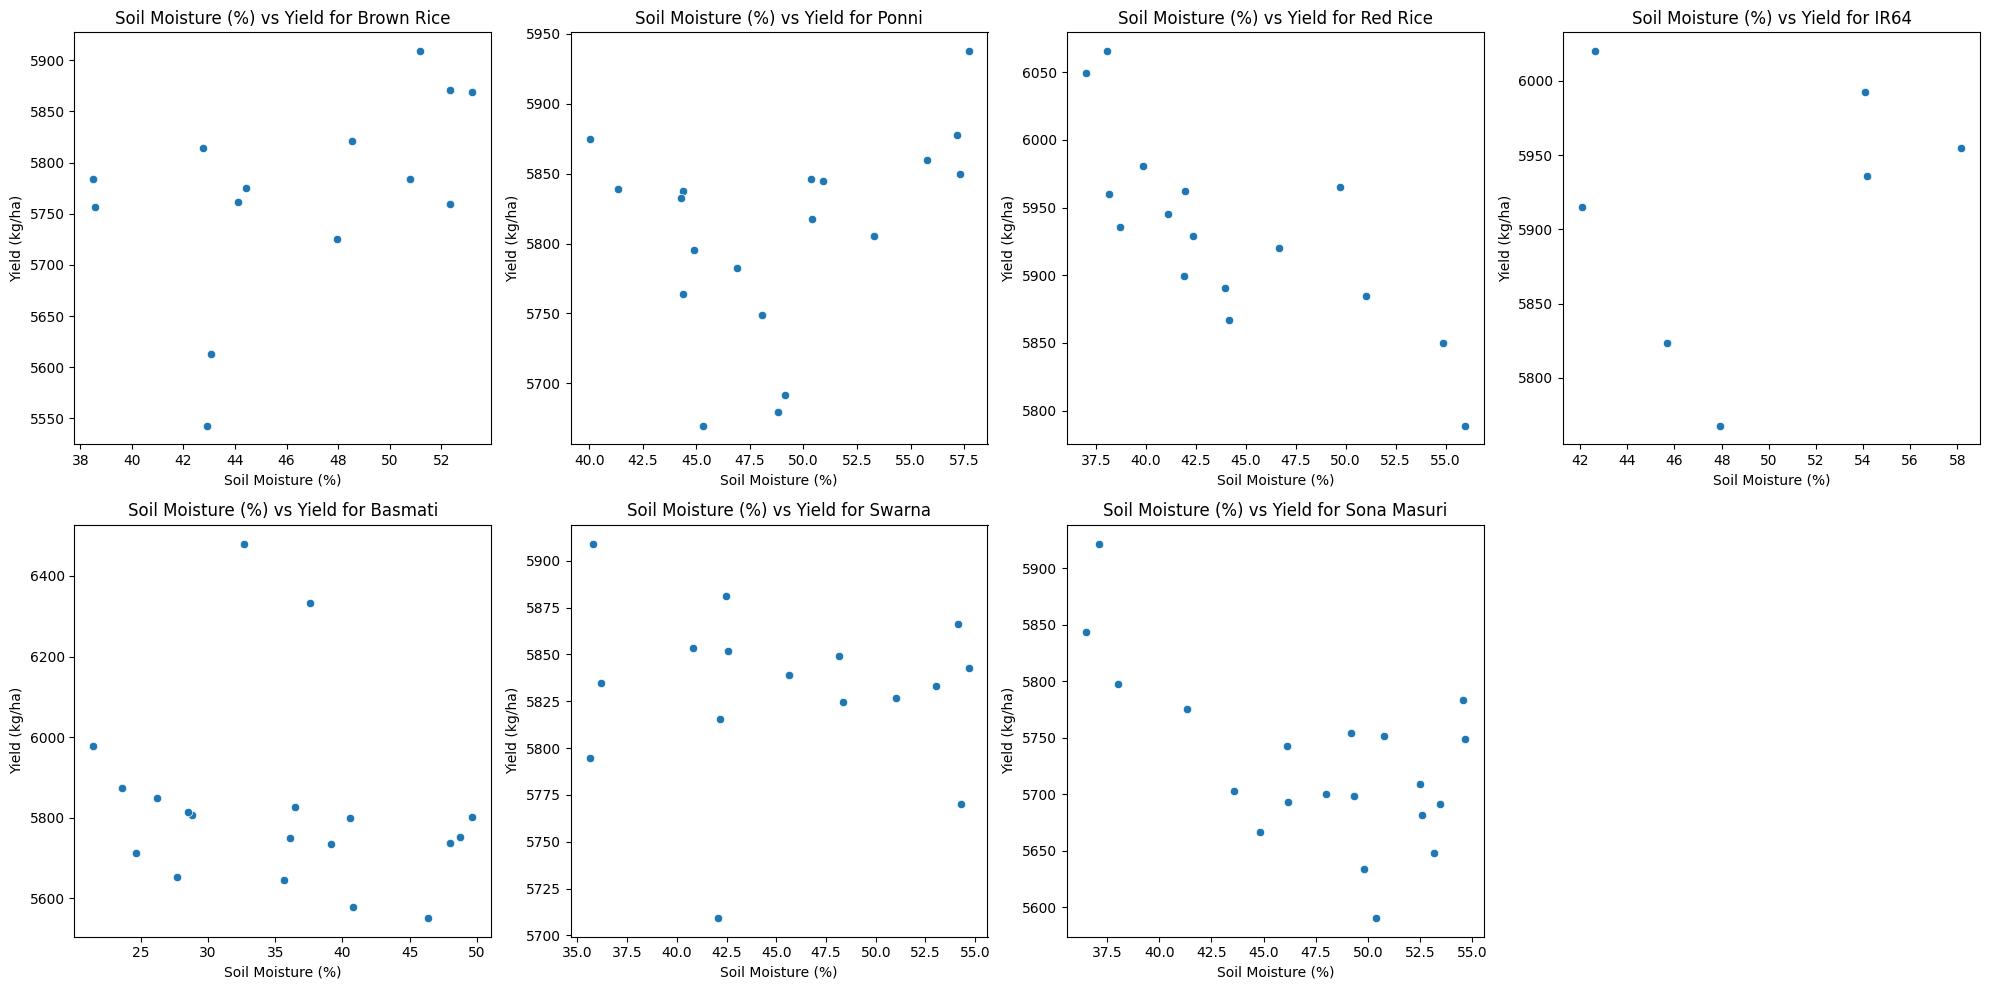

In [ ]:

rice_varieties = df['Rice Variety'].unique()
rice_varieties = [variety for variety in rice_varieties if pd.notna(variety)]
print(rice_varieties)

plt.figure(figsize=(20, 10))
for i, variety in enumerate(rice_varieties, 1):
    plt.subplot(2, 4, i)
    variety_data = df[df['Rice Variety'] == variety]
    sns.scatterplot(x='Temperature (°C)', y='Yield (kg/ha)', data=variety_data)
    plt.title(f'Temperature vs Yield for {variety}')
plt.tight_layout()
plt.show()

rice_varieties = df['Rice Variety'].unique()
rice_varieties = [variety for variety in rice_varieties if pd.notna(variety)]

plt.figure(figsize=(20, 10))
for i, variety in enumerate(rice_varieties, 1):
    plt.subplot(2, 4, i)
    variety_data = df[df['Rice Variety'] == variety]
    sns.scatterplot(x='Precipitation (mm)', y='Yield (kg/ha)', data=variety_data)
    plt.title(f'Precipitation vs Yield for {variety}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for i, variety in enumerate(rice_varieties, 1):
    plt.subplot(2, 4, i)
    variety_data = df[df['Rice Variety'] == variety]
    sns.scatterplot(x='Soil Moisture (%)', y='Yield (kg/ha)', data=variety_data)
    plt.title(f'Soil Moisture (%) vs Yield for {variety}')
plt.tight_layout()
plt.show()


**IMPLICATIONS**

* **Variability Across Varieties:**   
Different rice varieties may exhibit varying responses to temperature, precipitation, and soil moisture.
Scatter plots allow for visualizing how the relationship between these environmental factors and yield varies among rice varieties.

* **Identification of Patterns:**  
Examining the scatter plots helps identify patterns and potential trends between environmental variables and yield.
Patterns may include linear relationships, non-linear trends, or variations in responsiveness.

* **Decision Support:**   
Insights from these visualizations can support agricultural decision-making, helping farmers and researchers understand the factors influencing yield for specific rice varieties.
These visualizations provide valuable insights into the interactions between environmental factors and rice yield, fostering a more nuanced understanding of the dataset.

**CORRELATION MATRIX**

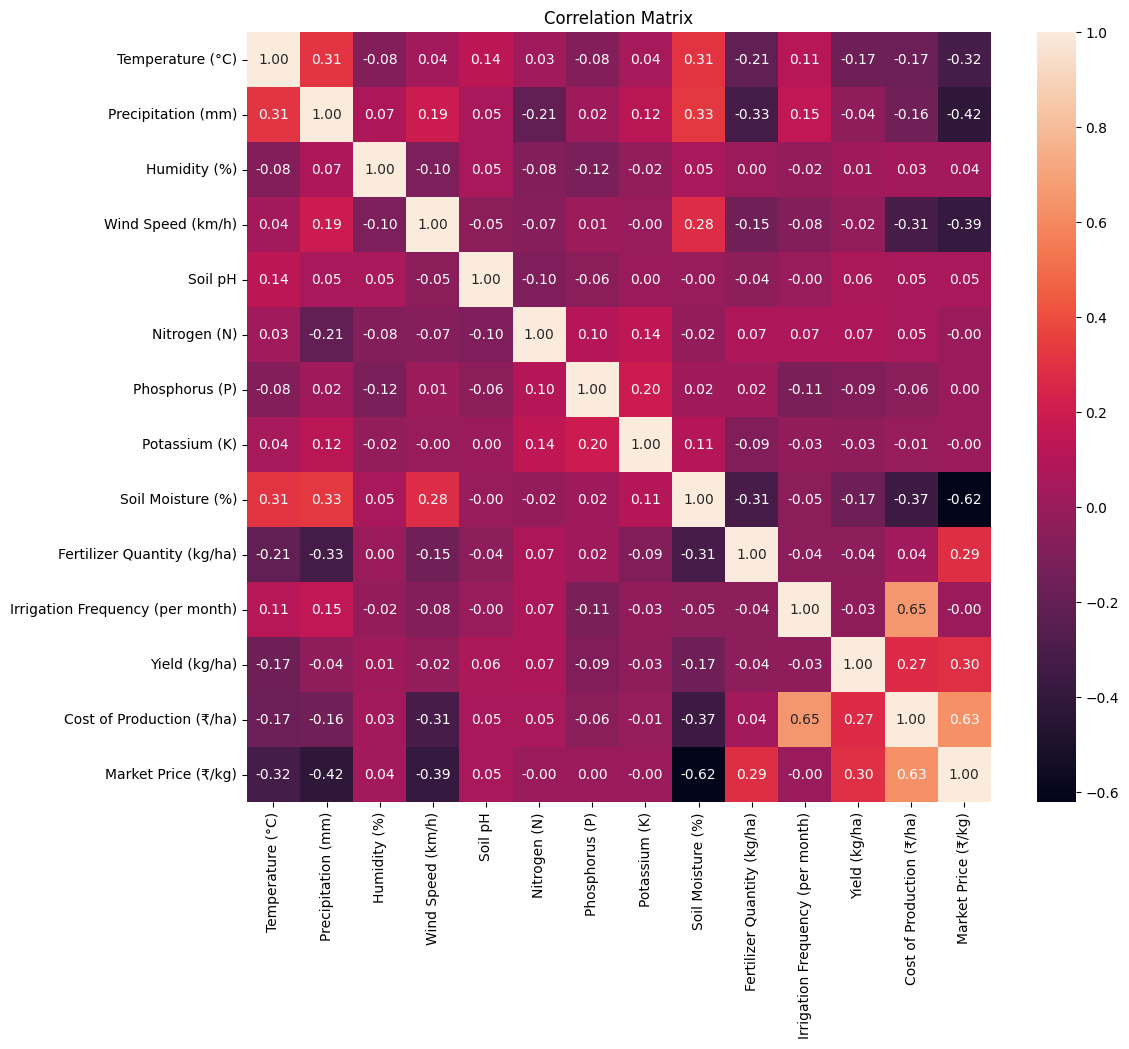

In [ ]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

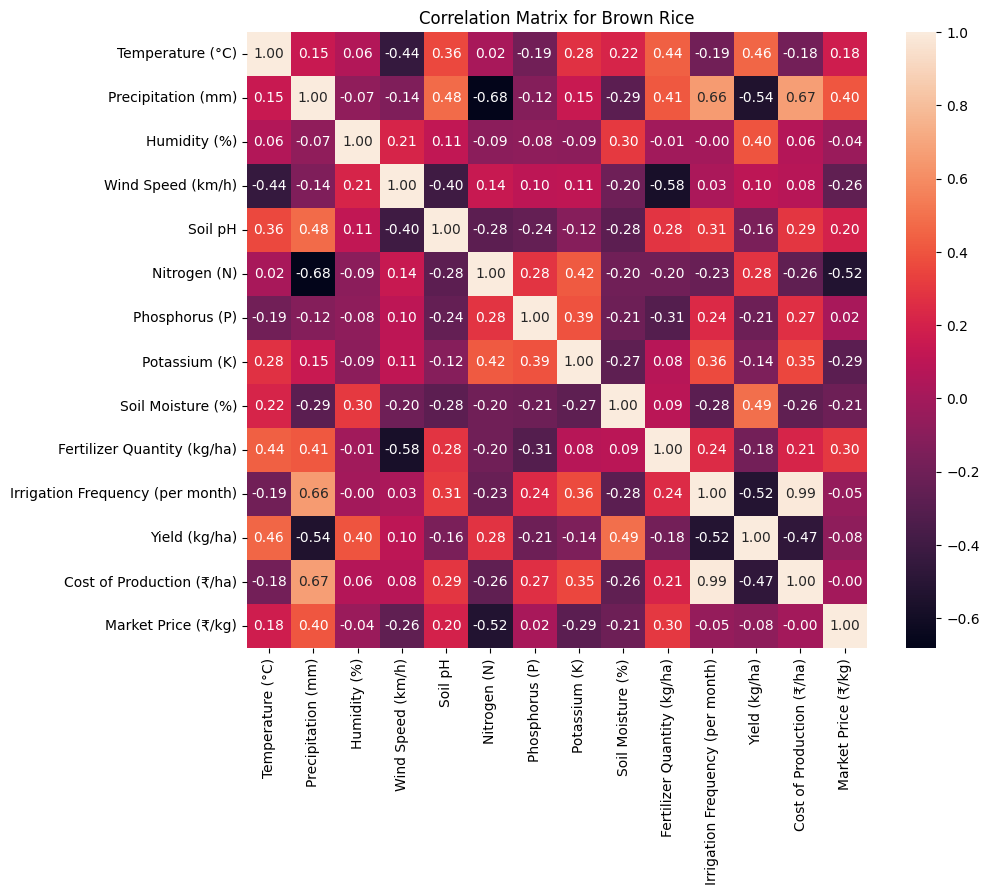

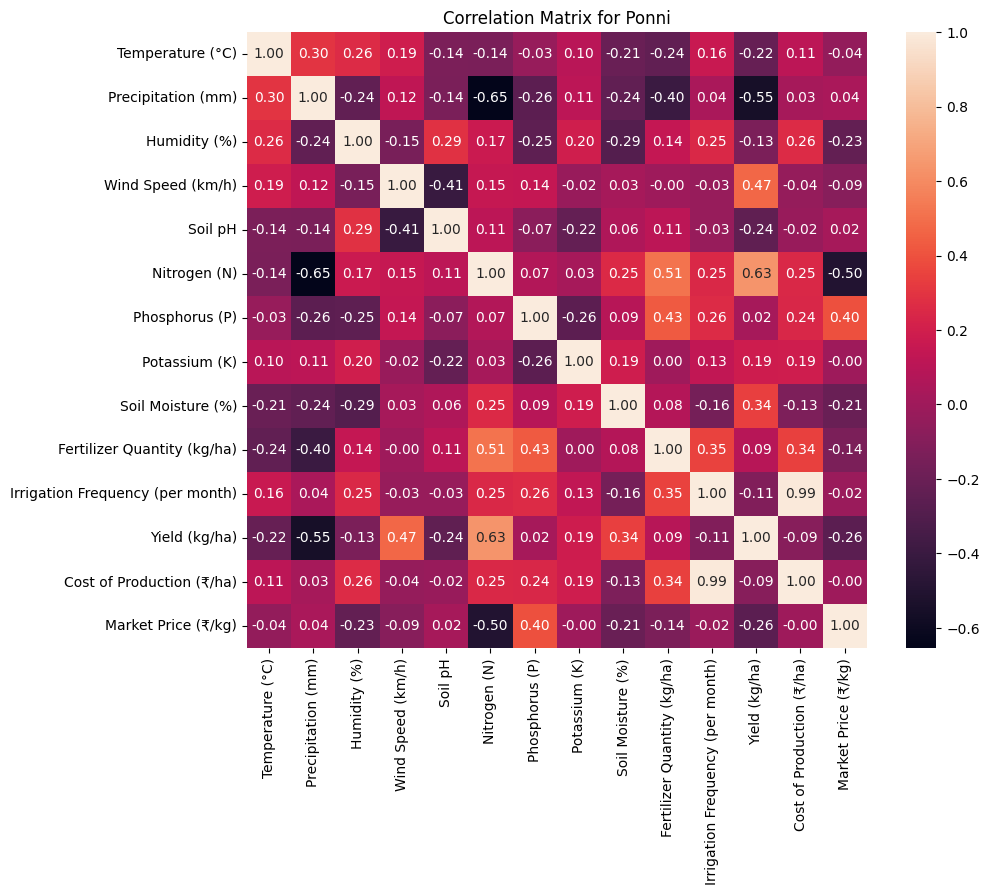

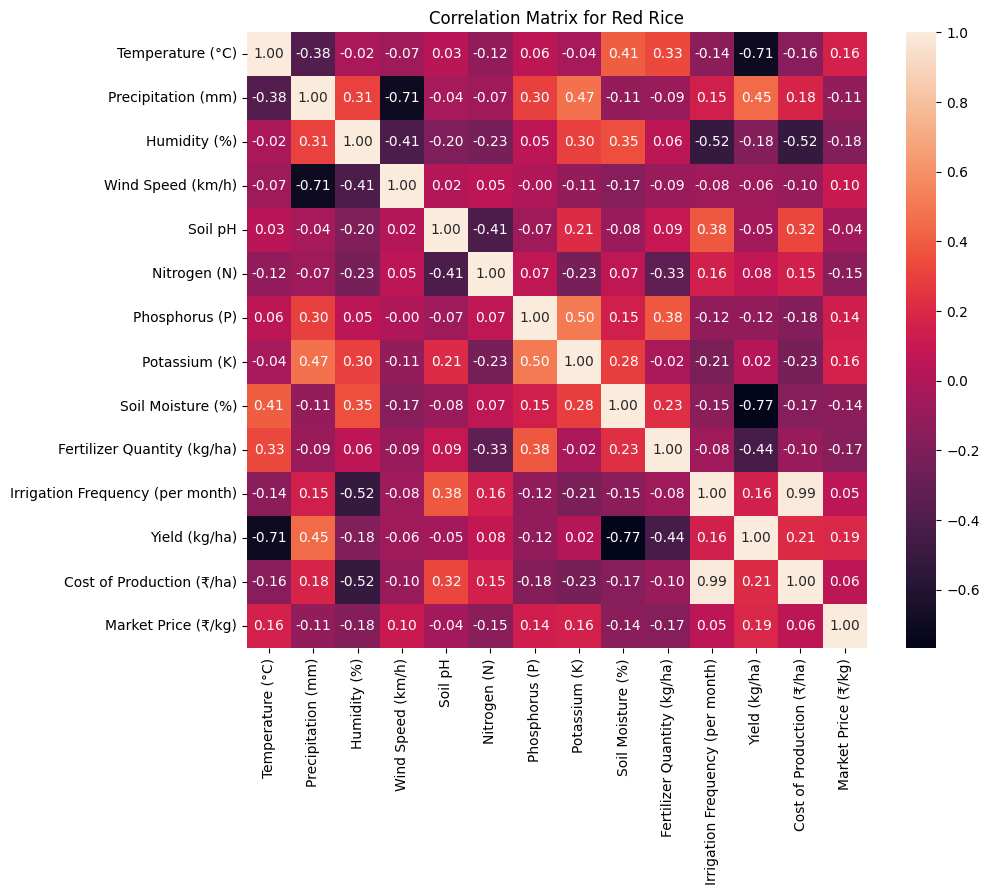

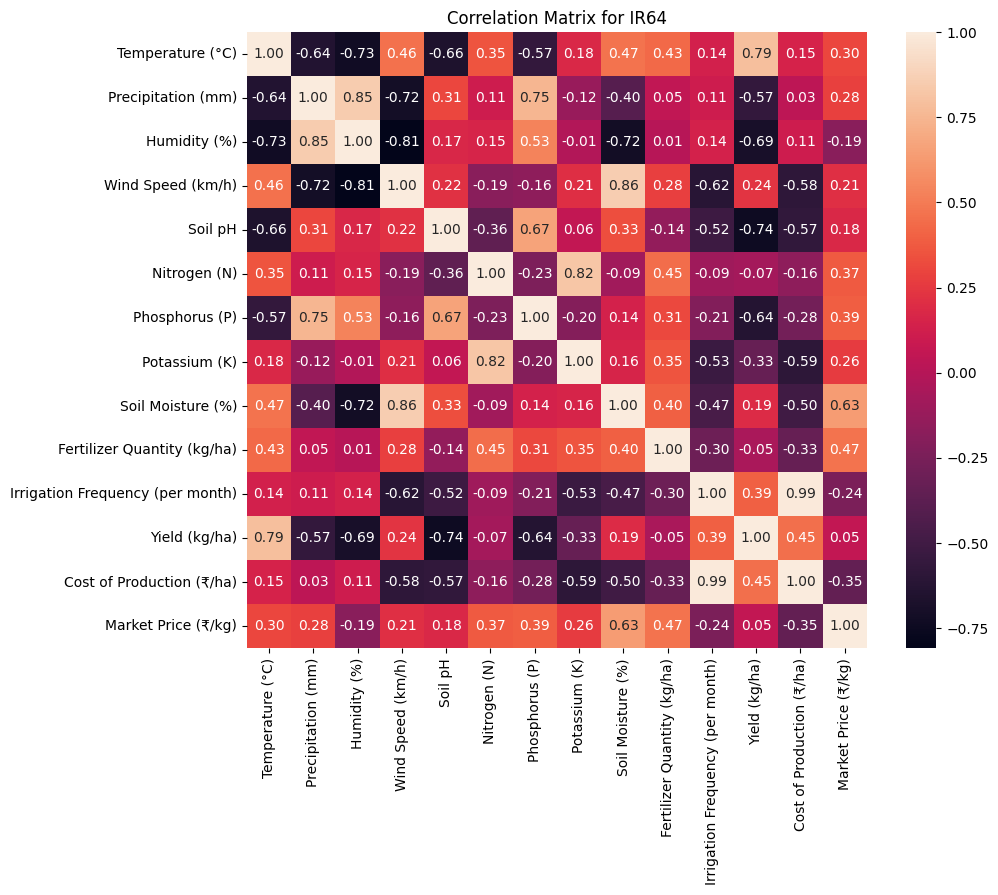

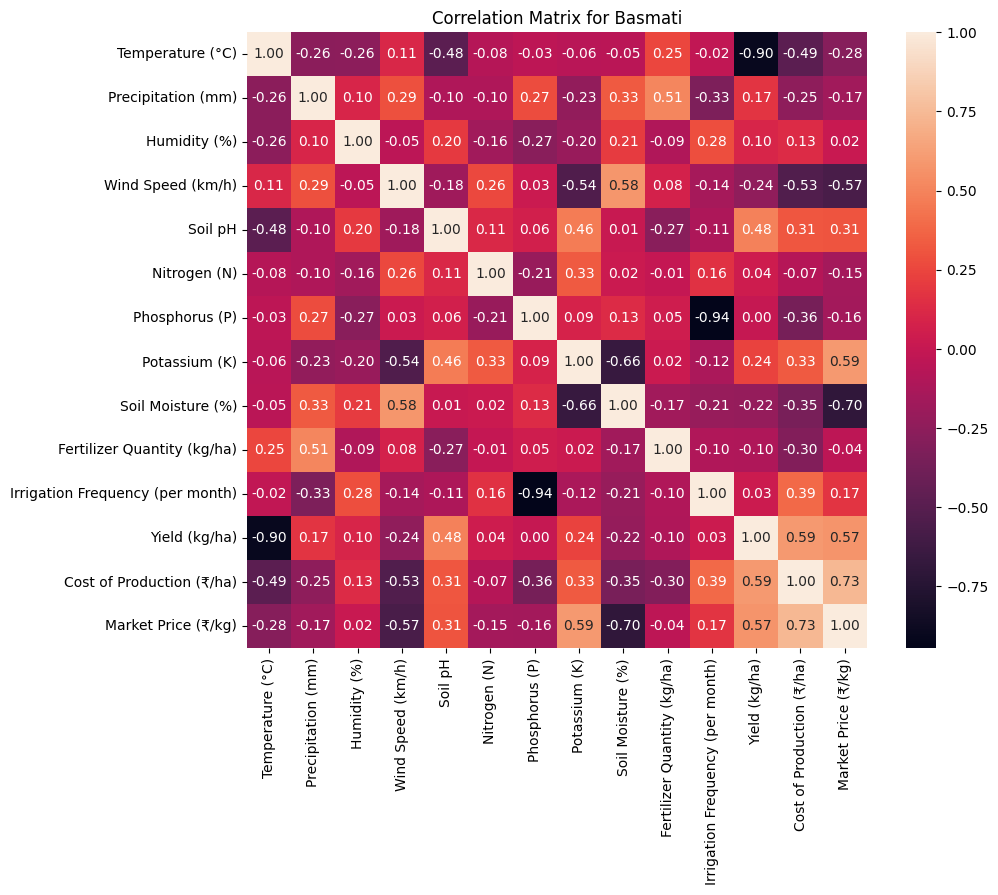

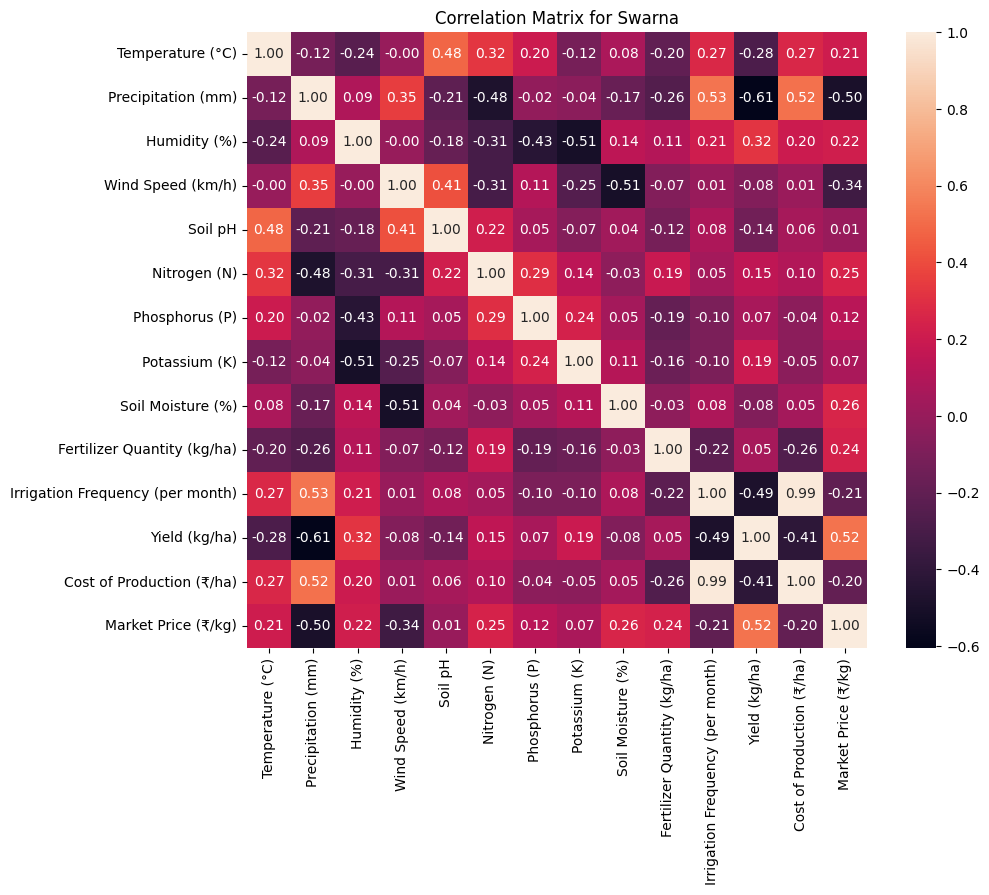

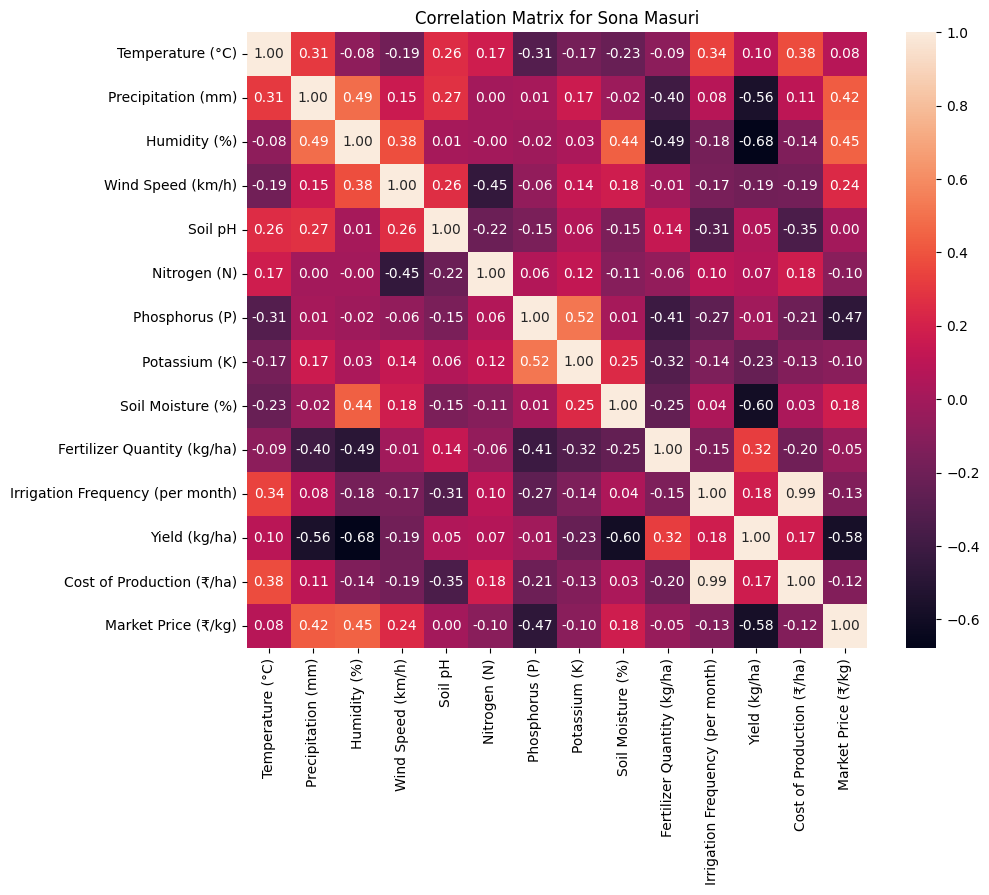

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


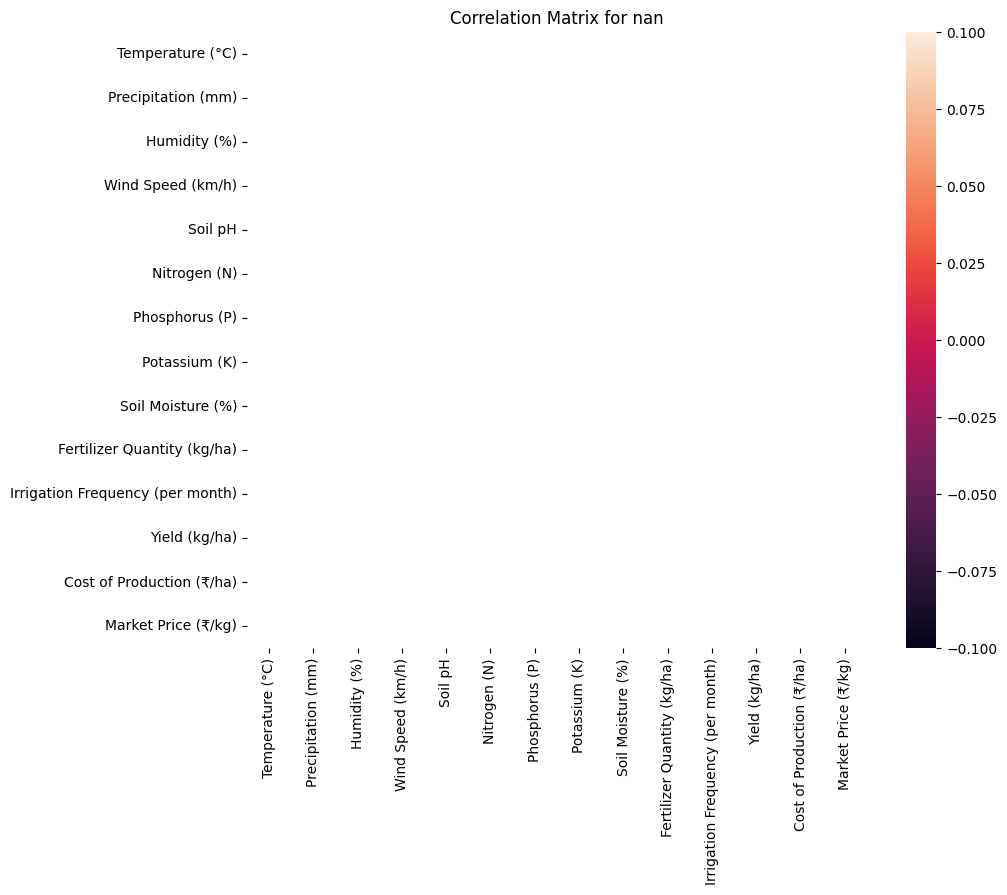

In [ ]:

varieties = df['Rice Variety'].unique()


for variety in varieties:

    variety_data = df[df['Rice Variety'] == variety]


    corr_matrix = variety_data.select_dtypes(include=[np.number]).corr()


    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f")
    plt.title(f'Correlation Matrix for {variety}')
    plt.show()


**IMPLICATIONS**  
* **Variability in Correlations:**   
  * Generating correlation matrices for each rice variety allows for an exploration of how relationships between variables differ across varieties.
  * Correlation coefficients quantify the strength and direction of linear relationships between pairs of numeric variables.

* **Identifying Variety-Specific Patterns:**   
  * Heatmaps provide an easy-to-read visualization of correlation structures.
  * High positive or negative correlations may indicate strong relationships, while values close to zero suggest weak or no linear relationships.

* **Feature Importance for Each Variety:**   
  * Understanding variety-specific correlation patterns helps identify which environmental factors may play a more significant role in determinin

Mean Squared Error (Original Scale): 35209.12649041765
R-squared (Original Scale): -2.0691748235555623


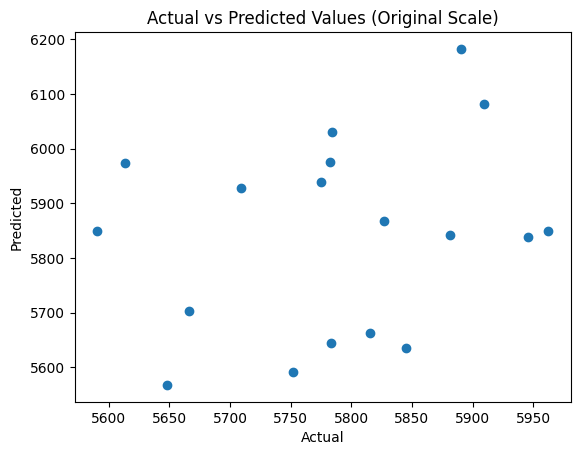

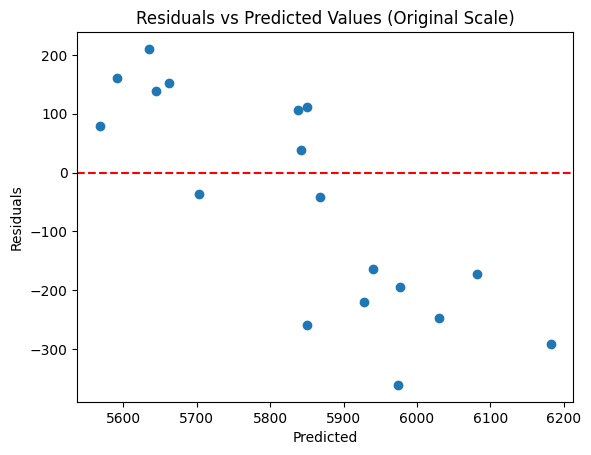

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = transformed_data.drop('Yield (kg/ha)', axis=1)
y = transformed_data['Yield (kg/ha)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

weight_factors = {
    'Temperature (°C)': 40,
    'Precipitation (mm)': 70,
    'Humidity (%)': 50,
    'Soil Moisture (%)': 30,
    'Fertilizer Quantity (kg/ha)': 60,
}

for feature, weight in weight_factors.items():
    X_train[feature] *= weight

model = LinearRegression()
model.fit(X_train, y_train)

for feature, weight in weight_factors.items():
    X_test[feature] *= weight


y_pred_log_scale = model.predict(X_test)

y_pred = np.exp(y_pred_log_scale)

y_test_original_scale = np.exp(y_test)

mse_original_scale = mean_squared_error(y_test_original_scale, y_pred)
r2_original_scale = r2_score(y_test_original_scale, y_pred)


print(f"Mean Squared Error (Original Scale): {mse_original_scale}")
print(f"R-squared (Original Scale): {r2_original_scale}")




plt.scatter(y_test_original_scale, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Original Scale)')
plt.show()

residuals_original_scale = y_test_original_scale - y_pred
plt.scatter(y_pred, residuals_original_scale)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Original Scale)')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


**IMPLICATIONS**

* **Mean Squared Error (MSE):**
 * MSE measures the average squared difference between the actual and predicted values.
 * A lower MSE indicates better model performance.

* **R-squared (R2):**
 * R2 represents the proportion of the variance in the target variable explained by the model.
 * R2 close to 1 indicates a good fit.

* **Actual vs Predicted Values:**
 * Scatter plot provides a visual assessment of how well the model predictions align with the actual values.
 * Points close to the diagonal line indicate accurate predictions.

* **Residuals vs Predicted Values:**
 * Residuals represent the differences between actual and predicted values.
 * The plot helps identify patterns or trends in the residuals, ensuring the absence of systematic errors.

In [ ]:
df_ponni = cleaned_data[cleaned_data['Rice Variety'] == 'Ponni']['Yield (kg/ha)']
df_br = cleaned_data[cleaned_data['Rice Variety'] == 'Brown Rice']['Yield (kg/ha)']


**Z-TEST**

The z-test is a statistical method used to determine if there's a significant difference between sample and population means or between the means of two independent samples. It's particularly useful when dealing with large sample sizes.

The z-test is be used to compare the means of two independent groups, such as different varieties of rice (Ponni and Brown Rice). The z-test helps determine whether there is a statistically significant difference in the yields of these two rice varieties

In [ ]:
from statsmodels.stats.weightstats import ztest

z_statistic, p_value = ztest(df_ponni, df_br)

if p_value < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the means of the two rice varieties.")
else:
    print("Fail to reject the null hypothesis - we do not have sufficient evidence to say there is a significant difference between the means.")


Fail to reject the null hypothesis - we do not have sufficient evidence to say there is a significant difference between the means.


**T-TEST**

A t-test is a statistical test used to determine if there is a significant difference between the means of two groups. It is particularly useful when the sample size is small, and the population standard deviation is unknown.

An independent samples t-test to compare the market prices of two different rice varieties: Brown Rice and Ponni.

In [ ]:
from scipy import stats
brown_rice_prices = cleaned_data[cleaned_data['Rice Variety'] == 'Brown Rice']['Market Price (₹/kg)']
ponni_prices = cleaned_data[cleaned_data['Rice Variety'] == 'Ponni']['Market Price (₹/kg)']

t_statistic, p_value = stats.ttest_ind(brown_rice_prices, ponni_prices, equal_var=False)

if p_value < 0.05:
    print("Reject the null hypothesis - there is a significant difference between the market prices of Brown Rice and Ponni.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference between the market prices of Brown Rice and Ponni.")

Fail to reject the null hypothesis - there is no significant difference between the market prices of Brown Rice and Ponni.


**ANOVA**

Analysis of Variance (ANOVA) is used for comparing means of three or more groups to determine whether there are statistically significant differences among them.

In [ ]:
from scipy.stats import f_oneway

df_anova = df[['Yield (kg/ha)', 'Rice Variety']]

f_statistic, p_value = f_oneway(*[group['Yield (kg/ha)'] for name, group in df_anova.groupby('Rice Variety')])

if p_value < 0.05:
    print("Reject the null hypothesis - there is a significant difference in yields among the rice varieties.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference in yields among the rice varieties.")


Reject the null hypothesis - there is a significant difference in yields among the rice varieties.
